In [22]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
import sys
sys.path.append("..")

In [25]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
from matplotlib import cm
cmap = viridis = cm.get_cmap('viridis', 100)

In [5]:
# plt.figure()
# plt.scatter(
#     sigma_flat, weights_flat, c=num_clusters, s=10, marker=".", edgecolors=None
# )
# plt.colorbar()
# plt.title("weights against sigma")
# plt.xlabel("sigma parameter")
# plt.ylabel("weights")
# plt.savefig("{}/sigma-{}.png".format(file_dir, filename))
# plt.close()

In [6]:
# plt.figure()
# plt.scatter(
#     sigma_flat, weights_flat, c=num_clusters, s=10, marker=".", edgecolors=None
# )
# plt.colorbar()
# plt.title("weights against sigma")
# plt.xlabel("sigma parameter")
# plt.ylabel("weights")
# plt.savefig("{}/sigma-{}.pdf".format(file_dir, filename))
# plt.close()

In [15]:
import GPy
from src.GP import fit_poisson_GP
import numpy as np

In [16]:
X = np.linspace(0, 10, 100)[:, None]
f_true = np.random.multivariate_normal(np.zeros(100), GPy.kern.RBF(1).K(X))
Y = np.array([np.random.poisson(np.exp(f)) for f in f_true])[:,None]
kernel = GPy.kern.RBF(1)


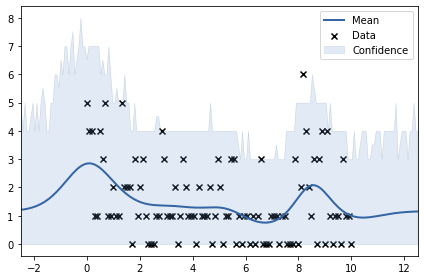

In [18]:
kernel = GPy.kern.RBF(1)
m = fit_poisson_GP(X, Y, kernel=kernel)

## Mixture modelling

In [26]:
df_market = pd.read_csv('../clean_data/tech_lse.csv')

In [29]:
companies = df_market.ticker
X = np.array([float(df_market[df_market.ticker==c].market_cap.agg(['mean'])) for c in companies]).reshape(-1,1)


In [50]:
import sklearn.mixture as mix
# Fit a Dirichlet process Gaussian mixture using five components
dpgmm = mix.BayesianGaussianMixture(n_components=10,
                                    covariance_type='full',
                                    
                                   ).fit(X)

In [51]:
dpgmm.get_params()

{'covariance_prior': None,
 'covariance_type': 'full',
 'degrees_of_freedom_prior': None,
 'init_params': 'kmeans',
 'max_iter': 100,
 'mean_precision_prior': None,
 'mean_prior': None,
 'n_components': 10,
 'n_init': 1,
 'random_state': None,
 'reg_covar': 1e-06,
 'tol': 0.001,
 'verbose': 0,
 'verbose_interval': 10,
 'warm_start': False,
 'weight_concentration_prior': None,
 'weight_concentration_prior_type': 'dirichlet_process'}

In [52]:
dpgmm.means_

array([[  170.91261081],
       [47966.84809165],
       [ 2932.02814491],
       [ 2949.17329911],
       [ 2850.82039703],
       [ 2813.5302476 ],
       [ 2778.28437068],
       [ 3254.07017036],
       [ 1880.32104914],
       [ 1880.29362604]])

In [53]:
dpgmm.weights_

array([9.00466418e-01, 3.05713033e-02, 1.94782703e-03, 1.90430102e-03,
       1.83037895e-03, 1.77509429e-03, 1.72192476e-03, 5.96393725e-02,
       1.31431669e-04, 1.19482798e-05])

In [54]:
dpgmm.fit_predict(X)

array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 6, 6, 6,
       6, 0, 6, 6, 6, 6, 0, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 6, 6,
       6, 0, 6, 6, 6, 6, 2, 6, 6, 6, 6, 6, 6, 6, 0, 2, 6, 6, 6, 6, 6, 6,
       6, 6, 0, 6, 6, 6, 0, 6, 6, 6, 6, 6, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 6, 2, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 0, 6, 6, 6, 6, 6, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 0, 6, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,